In [ ]:
# Import Required Packages
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for visualization
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
from sklearn.cluster import KMeans  # Import KMeans for clustering

In [ ]:
# Loading and examining the dataset
df = pd.read_csv("/content/drive/MyDrive/penguins.csv")  # Load the penguins dataset from the CSV file into a pandas DataFrame
df.head()  # Display the first 5 rows of the DataFrame to examine its structure and contents


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Columns in the dataset


-
Species: penguin species (Chinstrap, Adélie, or Gentoo)
-
Island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
-
culmen_length_mm: culmen length (mm)
-
culmen_depth_mm: culmen depth (mm)
-
flipper_length_mm: flipper length (mm)
-
body_mass_g: body mass (g)
-
Sex: penguin sex
-

In [ ]:
df.shape

(344, 5)

In [ ]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
penguins_df.boxplot()  # Generate a boxplot to visualize the distribution of numerical variables in the DataFrame
plt.show()  # Display the boxplot

In [ ]:
#df.dropna()

In [ ]:
df = df.dropna()  # Remove rows with missing values from the DataFrame

In [ ]:
df.shape

(335, 5)

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


Detecting outliers in a dataset can be done using various statistical methods and visualization techniques

In [ ]:
#detect outliers using descriptive statistics
# Compute summary statistics
mean = df["flipper_length_mm"].mean()
median = df["flipper_length_mm"].median()
std_dev = df["flipper_length_mm"].std()
Q1 = df["flipper_length_mm"].quantile(0.25)
Q3 = df["flipper_length_mm"].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Detect outliers
outliers = df[(df["flipper_length_mm"] < lower_bound) | (df["flipper_length_mm"] > upper_bound)]

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:")
print(outliers)

Mean: 214.355223880597
Median: 197.0
Standard Deviation: 263.25350779494266
Q1: 190.0
Q3: 213.0
IQR: 23.0
Lower Bound: 155.5
Upper Bound: 247.5
Outliers:
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9               42.0             20.2             5000.0       4250.0  MALE
14              34.6             21.1             -132.0       4400.0  MALE


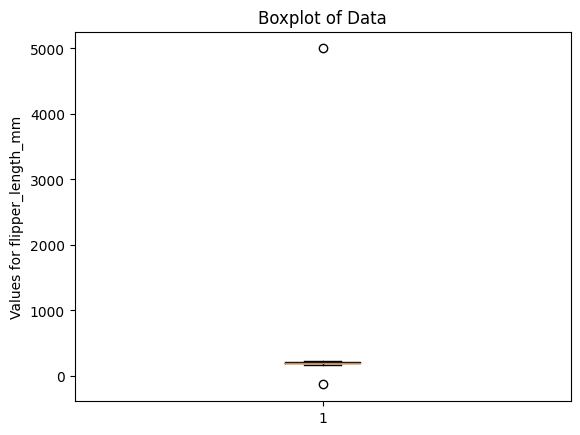

In [ ]:
# Plot boxplot
plt.boxplot(df["flipper_length_mm"])
plt.title('Boxplot of Data')
plt.ylabel('Values for flipper_length_mm')
plt.show()

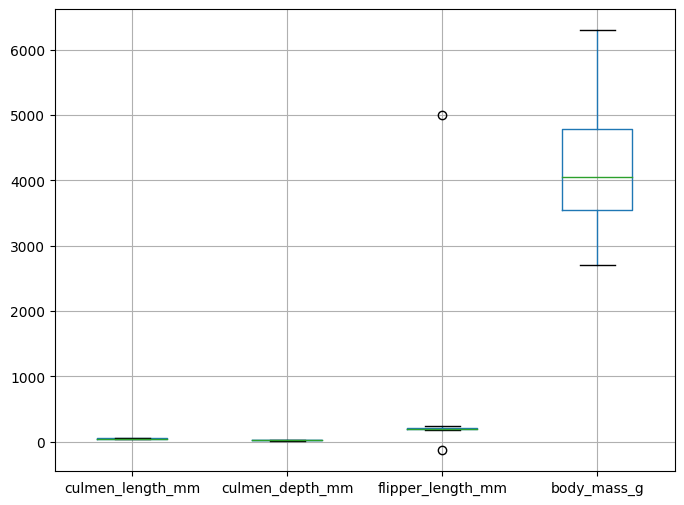

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot()
plt.show()

In [ ]:
df[df["flipper_length_mm"] > 4000]
df[df["flipper_length_mm"] < 0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE


In [ ]:
# Drop specific rows (index 9 and 14) from the DataFrame to remove outliers
df_cleaned = df.drop([9, 14])

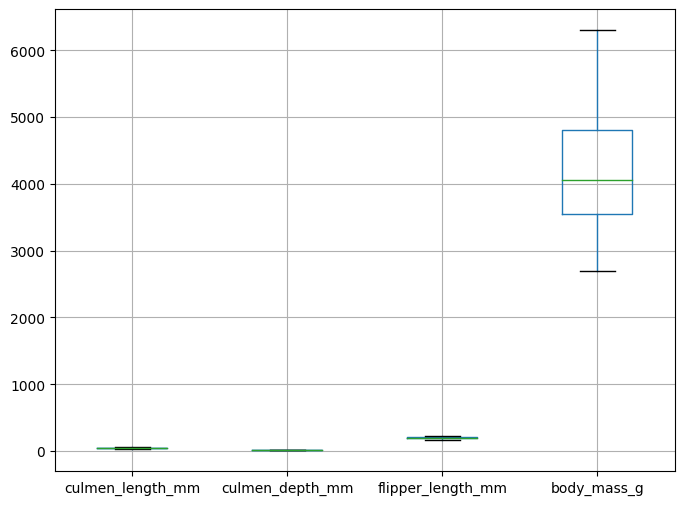

In [ ]:
plt.figure(figsize=(8, 6))
df_cleaned.boxplot()
plt.show()

In [ ]:
# Convert categorical variables into dummy/indicator variables and drop one of the resulting columns to avoid multicollinearity
# Drop the column 'sex_.' which corresponds to the category 'sex' with the lowest lexicographic order
df = pd.get_dummies(df_cleaned).drop("sex_.", axis=1)

# Display the first few rows of the DataFrame
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [ ]:
# Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()  # Initialize the StandardScaler object for scaling the data
scaled_data = scaler.fit_transform(df)  # Fit the scaler to the data and transform it

In [ ]:
# Convert the scaled data array back to a DataFrame
df_preprocessed = pd.DataFrame(data=scaled_data, columns=df.columns)
df_preprocessed.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008


Before PCA:


The number of features in your original dataset represents its dimensionality.


After PCA:


The number of principal components you retain after performing PCA will determine the new dimensionality of your dataset.

In [54]:
# Get the dimensionality of the original dataset
original_dimension = df_preprocessed.shape[1]  # Number of columns/features
original_dimension

6

In [55]:
# Initialize PCA with n_components=None to keep all components
pca = PCA(n_components=None)

# Fit PCA to the preprocessed the dataset
dfx_pca = pca.fit(df_preprocessed)

In [57]:
# Get the explained variance ratio of each principal component
explained_variance_ratio = dfx_pca.explained_variance_ratio_

# Calculate the number of components needed to explain at least 10% of the variance
n_components = sum(explained_variance_ratio > 0.1)

# Initialize PCA with the determined number of components
pca = PCA(n_components=n_components)

# Fit PCA to the preprocessed penguins dataset again with the determined number of components
penguins_PCA = pca.fit_transform(df_preprocessed)

# Print the number of components
print("Number of components:", n_components)


Number of components: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

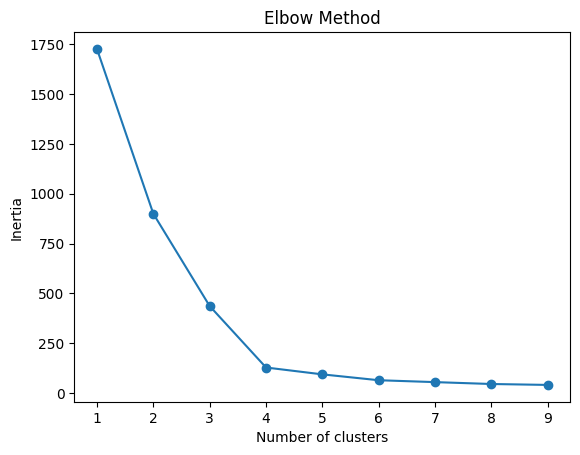

In [58]:
# Initialize an empty list to store the inertia values
inertia = []

# Iterate over a range of cluster numbers from 1 to 9
for k in range(1, 10):
    # Fit KMeans clustering algorithm to the data with 'k' clusters
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    # Append the inertia (sum of squared distances of samples to their closest cluster center) to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Based on the elbow method, choose the number of clusters
n_clusters = 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


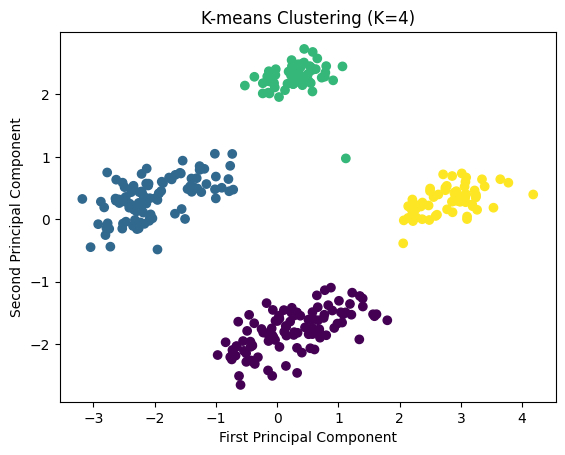

In [59]:
# Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

# Scatter plot of the data points colored by their cluster labels
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")

# Set labels for x-axis and y-axis
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

# Set title for the plot including the number of clusters
plt.title(f"K-means Clustering (K={n_clusters})")

# Display the plot
plt.show()